**Answer Q1**

**PART 2**

In [ ]:
# Mounting the Google Drive for accessing the iris dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the necessary package to read the dataset
import pandas as pd

# Reading the content of the dataset to a dataframe
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Files/processedClevelandData.csv",sep=";")

# Dropping the oldpeak and id column
df.drop(columns=['id', 'oldpeak'])

,Age,Sex,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,2.0,1.0,3.0,1


**Answer 1. c.**

In [ ]:
# Adding the intercept to the model
x = sm.add_constant(x)

# Fitting the linear regresson model
lm = sm.OLS(y,x).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   chol   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.184
Date:                Wed, 27 May 2020   Prob (F-statistic):             0.0235
Time:                        19:10:02   Log-Likelihood:                -1622.8
No. Observations:                 303   AIC:                             3250.
Df Residuals:                     301   BIC:                             3257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        196.2820     22.337      8.787      0.0

From the above summary, it is observed that the 95 % confidence interval 
1. For the predictor is **0.052 - 1.714** 
2. For the constant is **152.326 - 240.238**

**It is observed that the intercept value is of no significance in the model. Hence, we remove it from the model**

**Answer 1. a.**

In [ ]:
x = df["trestbps"]
# Fitting the linear regresson model
lm = sm.OLS(y,x).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                   chol   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              5511.
Date:                Wed, 27 May 2020   Prob (F-statistic):                   5.39e-196
Time:                        18:52:02   Log-Likelihood:                         -1657.4
No. Observations:                 303   AIC:                                      3317.
Df Residuals:                     302   BIC:                                      3320.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Answer 1. b.**

The coefficient of the predictor variable trestbps is 1.8472. Here we look at the two aspects of the coefficient of the predictor variable i.e. the sign if the coefficient and the value of the coefficient. 
1. It is obsered that the sign is positive which means that as the value of this predictor variable increases, the mean of the dependent variable also increases. 
2. Since the value of coefficient is 1.8472, it essentially implies that the mean response value increases by 1.8472 units for every 1 unit change in the predictor. 

In [ ]:
# Predicting the cholesterol level associated with a resting blood pressure of 135
predictions = lm.predict(135) 
print(predictions)

[249.37466414]


**Answer 2**

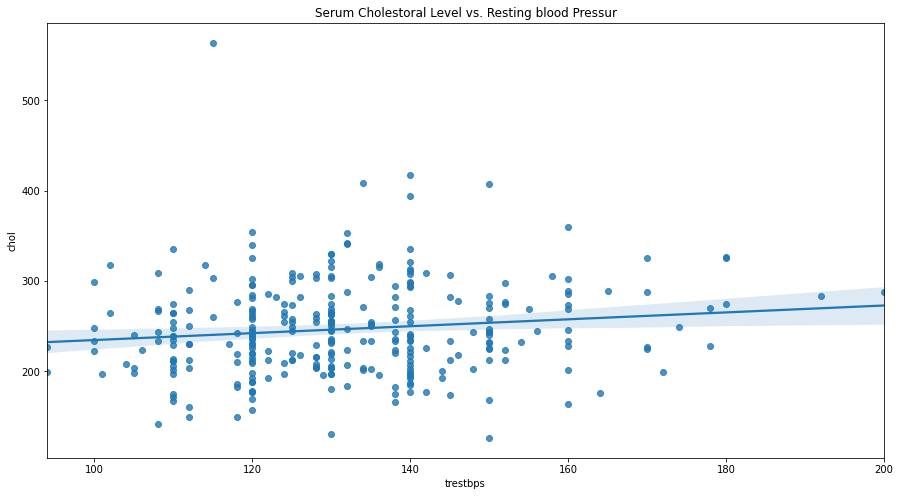

In [ ]:
# Importing necessary packages
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting Regplot with Seaborn
plt.figure(figsize = (15,8))
sns.regplot(df.trestbps, df.chol)
plt.title('Serum Cholestoral Level vs. Resting blood Pressure')
plt.show()

**Answer 3**

In [ ]:
# Selecting the predictors
x = df[['trestbps','Sex','Age','fbs']]

# Fitting the linear regresson model
lm = sm.OLS(y,x).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                   chol   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              1591.
Date:                Wed, 27 May 2020   Prob (F-statistic):                   4.24e-200
Time:                        19:58:19   Log-Likelihood:                         -1635.2
No. Observations:                 303   AIC:                                      3278.
Df Residuals:                     299   BIC:                                      3293.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

**Here Sex is a categorical variable**

**Answer 3. a.**

Equation y = trestbps.c1 + Sex.C2 + Age.C3 + fbs.C4

where c1, c2, c3, c4 are the contants of regression

**Answer 3. b.**

The following predictors have positive effect on the disease progression: 
1. trestbps i.e. resting blood pressure
2. Age

The following predictors have negative effect on the disease progression: 
1. Sex
2. fbs i.e. fasting blood sugar level



**Answer 3. c.**

For the all the four predictors namely:
1. trestbps
2. Age
3. Sex
4. fbs,  
 we can reject the null hypyothesis. This is because they have a coefficient value and their p-values are less that  0.05

**Answer 3. d.**

The adjusted r-squared value is 0.955. There are two observations with respect to the value of the adjusted r-squared.
1. This value reflects the fit of the model. It varies from 0 to 1. A value equal to 1 indicates a perfect fit. Hence, 0.955 indicates a pretty good fit in this case. 
2. It is also observed that the value of the adjusted r-squared is equal to the value of the r-squared, which essentially indicates that all the predictor variables are quite strongly correlated to the response variable. 

**Answer 4. a.**

In [ ]:
from scipy.stats import pearsonr

# calculate Pearson's correlation

corr, _ = pearsonr(df['Age'], df['chol'])
print('Pearson correlation coefficient: %.3f' % corr)

Pearson correlation coefficient: 0.209


Hence, there is almost no correlation between the two variables age and cholesterol level. 

**Answer is FALSE**

**Answer 4. b.**

In [ ]:
df.groupby('Sex').mean()

,id,Age,cp,trestbps,chol,fbs,resetecg,thalach,exang,slope,num
Sex,,,,,,,,,,,
0.0,161.030928,55.721649,3.144330,133.340206,261.752577,0.123711,0.958763,151.226804,0.226804,1.567010,0.536082
1.0,147.747573,53.834951,3.165049,130.912621,239.601942,0.160194,1.004854,148.844660,0.373786,1.616505,1.126214


Hence, females have higher cholesterol level than males.

**Answer is TRUE**

**Answer 4. c.**

In [ ]:
# calculate Pearson's correlation

corr, _ = pearsonr(df['fbs'], df['chol'])
print('Pearson correlation coefficient: %.3f' % corr)

Pearson correlation coefficient: 0.010


There is no correlation.

**Answer is FALSE**

**Answer 4. d.**

In [ ]:
# calculate Pearson's correlation

corr, _ = pearsonr(df['trestbps'], df['chol'])
print('Pearson correlation coefficient: %.3f' % corr)

Pearson correlation coefficient: 0.130


No correlation. 

**Answer is FALSE**

**Answer Q2**


1)

There are two significant predictors of these models: 
**Trestbps (p-value = 0.025) and Sex ( also p-value = 0.025)** 

That means that for these two predictors , there is a low chance for mistake in properly predicting the predicted variable in this model. It implies that the predictor variables are correlated with the dependent variables.

Also it is noted that the coefficients of the predictor variables are positive i.e. 2.82 and 2.37 respectively which implies that with the increase in the values of the predictors, the mean of the dependent variable increases.










2)

Please look in the attached pdf


3)

I’d tell him that both Sex and Trestbps are good predictors to give rather  accurate prediction for the predicted variable, unlike chol( cholesterol) which is a non-significant predictor.
I’d also tell him that if the chol variable would have been removed we’d may be get  a better prediction of the predicted variable.  

Also we can observe that the constant intercept is not significant as well. Hence, it can also be removed from the model to further increase the prediction capacity of the model.